# Import  library


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# load data

In [2]:
train=pd.read_csv(r"C:\Users\lap shop\OneDrive\Documents\machin lear\project 2\split\train.csv")
val=pd.read_csv(r'C:\Users\lap shop\OneDrive\Documents\machin lear\project 2\split\val.csv')
trainval=pd.read_csv(r'C:\Users\lap shop\OneDrive\Documents\machin lear\project 2\split\trainval.csv')

In [3]:
train.shape

(170884, 31)

In [4]:
trainval.shape

(56960, 31)

# understand data

In [5]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [6]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- Most of features are anonymous, hence you can’t use domain knowledge
-  2 clear features: time and amount of the transaction
- in scaling do for time and AMount because other feats scaled by PCA 

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [8]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,...,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,...,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,...,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,...,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,...,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


In [9]:
train.skew()

Time      -0.039429
V1        -3.219164
V2        -4.595180
V3        -2.264603
V4         0.682350
V5        -3.832642
V6         2.234061
V7         4.421435
V8        -9.103418
V9         0.527373
V10        1.003994
V11        0.347855
V12       -2.301048
V13        0.072673
V14       -1.974437
V15       -0.299761
V16       -1.105041
V17       -3.940282
V18       -0.262413
V19        0.099712
V20       -2.021569
V21        3.463795
V22       -0.208784
V23       -4.767693
V24       -0.541481
V25       -0.396849
V26        0.566494
V27        0.514650
V28        5.064013
Amount    19.991968
Class     23.606927
dtype: float64

- most feats is not sysmtrec distiptuin

 # analysis features.

## target 

- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [10]:
train['Class'].describe()


count    170884.000000
mean          0.001785
std           0.042210
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

<Axes: xlabel='Class', ylabel='count'>

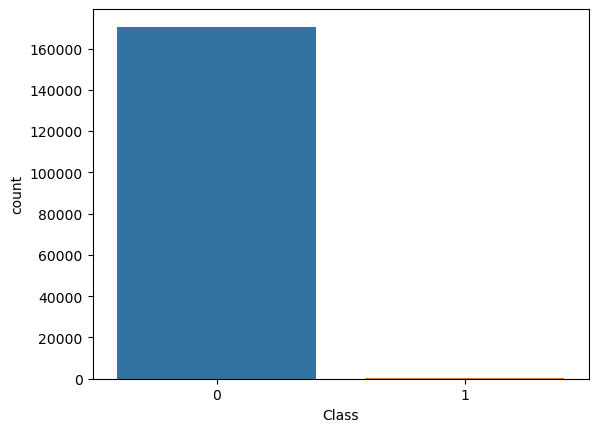

In [11]:
sns.countplot(x=train["Class"])

- 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [12]:
print('No Frauds', round(train['Class'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Frauds', round(train['Class'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

No Frauds 99.82 % of the dataset
Frauds 0.18 % of the dataset


In [13]:
print('No Frauds', round(val['Class'].value_counts()[0]/len(val) * 100,2), '% of the dataset')
print('Frauds', round(val['Class'].value_counts()[1]/len(val) * 100,2), '% of the dataset')

No Frauds 99.84 % of the dataset
Frauds 0.16 % of the dataset


- here  big impalned for class 0
- so 0 is a majority class and 1 in minority  class 
- lets do some startrigi help me and choose best solution i do it in train file 
- imbalnced in train and val

## feautres 

In [14]:
train["Time"].describe()

count    170884.000000
mean      94966.107886
std       47464.723773
min           0.000000
25%       54348.000000
50%       84923.500000
75%      139404.000000
max      172792.000000
Name: Time, dtype: float64

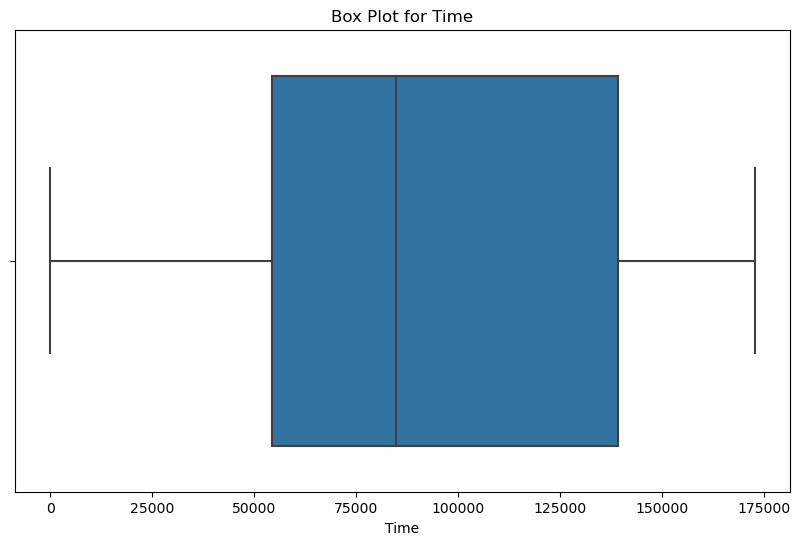

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train["Time"])
plt.title("Box Plot for Time")
plt.xlabel("Time")
plt.show()

(array([1298., 1016.,  818.,  472.,  464.,  422.,  743.,  341.,  421.,
         219.,  304.,  591.,  486.,  502.,  616.,  936., 1235., 1309.,
        1848., 2343., 2293., 2339., 2382., 2428., 2410., 2417., 2105.,
        2114., 2192., 2326., 2248., 2446., 2123., 2189., 2332., 2266.,
        2347., 2248., 2309., 2729., 2254., 2355., 2514., 2664., 2789.,
        3217., 2574., 2194., 2015., 1414., 1366.,  786.,  690.,  471.,
         494.,  499.,  721.,  318.,  441.,  228.,  314.,  393.,  448.,
         705.,  759., 1245., 1203., 1395., 1741., 2173., 2483., 2389.,
        2411., 2430., 2353., 2292., 2212., 2305., 2242., 2373., 2520.,
        2461., 2545., 2473., 2422., 2569., 2446., 2302., 2595., 2264.,
        2159., 2135., 2263., 2267., 2410., 2152., 1911., 1696., 1552.,
        1245.]),
 array([     0.  ,   1727.92,   3455.84,   5183.76,   6911.68,   8639.6 ,
         10367.52,  12095.44,  13823.36,  15551.28,  17279.2 ,  19007.12,
         20735.04,  22462.96,  24190.88,  25918.8 ,  2

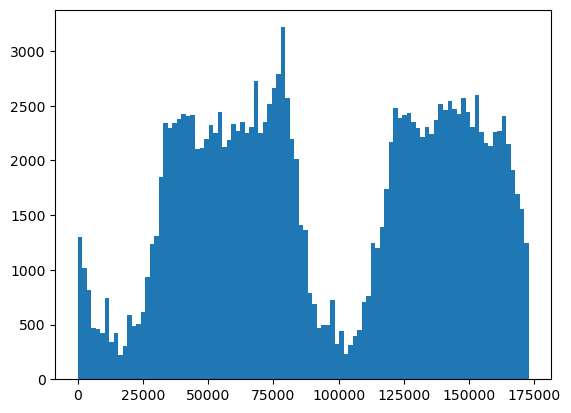

In [16]:
plt.hist(x=train["Time"],bins=100)

- the unit time here is a second 

In [17]:
train['Hour'] = train['Time'].apply(lambda x: np.floor(x / 3600))
tmp = train.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,3828.04,2357,147735.88,62.679627,12.990,31883.440038
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,1309,88211.80,67.388694,24.150,21156.921480
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,934,65982.41,70.644979,17.715,55652.672151


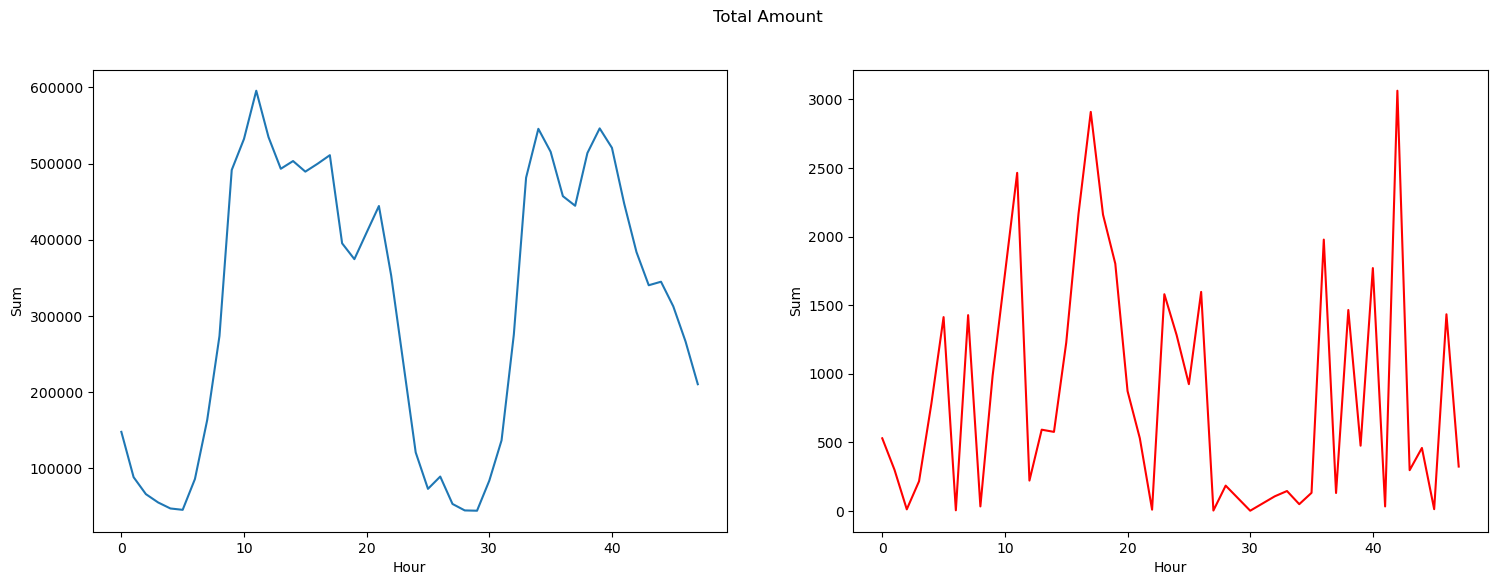

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

# amount

In [19]:
train['Amount'].describe()

count    170884.000000
mean         88.511723
std         256.737144
min           0.000000
25%           5.637500
50%          22.020000
75%          77.650000
max       25691.160000
Name: Amount, dtype: float64

In [20]:

frauds = train[train.Class == 1]
normal = train[train.Class == 0]

In [21]:
frauds.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.0,305.000000
mean,78809.527869,-4.871703,3.626213,-6.997144,4.513319,-3.248521,-1.357488,-5.799830,0.284671,-2.526034,...,-0.024873,-0.047097,-0.082505,-0.016398,0.022843,0.139570,0.083905,126.747738,1.0,21.419672
std,47649.707420,6.778974,4.415437,7.148266,2.885717,5.389456,1.971161,7.454958,7.346830,2.616606,...,1.637399,1.872300,0.516729,0.843818,0.482232,1.399888,0.551865,253.341868,0.0,13.216602
min,406.000000,-28.709229,-8.402154,-30.177317,-1.313275,-20.087878,-6.406267,-43.557242,-41.044261,-13.434066,...,-8.887017,-19.254328,-1.929717,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0,0.000000
25%,41233.000000,-6.133987,1.176270,-8.966558,2.378367,-4.801176,-2.440115,-8.783235,-0.248778,-3.880663,...,-0.532228,-0.330358,-0.434643,-0.328168,-0.277498,-0.028671,-0.091646,1.000000,1.0,11.000000
50%,70536.000000,-2.349340,2.632881,-4.946075,4.035987,-1.688433,-1.413476,-3.104557,0.555945,-1.997331,...,0.033958,-0.053596,-0.016186,0.077913,-0.010091,0.349191,0.140999,12.310000,1.0,19.000000
75%,121238.000000,-0.430330,5.083690,-2.092516,6.348334,0.186939,-0.356797,-0.882850,1.709417,-0.695263,...,0.615319,0.320133,0.333540,0.456090,0.374802,0.792691,0.398927,111.700000,1.0,33.000000
max,169966.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,17.903574,3.353525,...,8.361985,5.466230,0.994110,2.024388,2.745261,3.052358,1.773326,1504.930000,1.0,47.000000


In [22]:
normal.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,...,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.0,170579.000000
mean,94994.996301,0.007639,-0.007390,0.009784,-0.010677,0.005959,0.003207,0.009558,-0.002841,0.003893,...,0.000101,0.000560,-0.000748,-0.000565,-0.000781,0.000156,0.000273,88.443356,0.0,25.895409
std,47459.606807,1.928712,1.634212,1.463346,1.399522,1.369812,1.335703,1.196438,1.169294,1.088576,...,0.724037,0.616149,0.605286,0.520376,0.481719,0.400523,0.314373,256.738807,0.0,13.176752
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-31.764946,-73.216718,-6.290730,...,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.0,0.000000
25%,54370.500000,-0.919407,-0.600177,-0.890909,-0.850336,-0.689877,-0.767360,-0.551906,-0.209570,-0.639623,...,-0.542858,-0.160880,-0.354454,-0.318038,-0.327660,-0.070725,-0.053011,5.680000,0.0,15.000000
50%,84948.000000,0.018855,0.064236,0.179392,-0.023159,-0.053215,-0.273113,0.041517,0.021068,-0.050311,...,0.006481,-0.010648,0.040502,0.016758,-0.051315,0.001427,0.011169,22.040000,0.0,23.000000
75%,139423.000000,1.317039,0.798964,1.029841,0.732695,0.612372,0.401492,0.569893,0.324742,0.596210,...,0.528812,0.147662,0.438105,0.350096,0.240431,0.091241,0.078223,77.500000,0.0,38.000000
max,172792.000000,2.451888,17.930550,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,0.0,47.000000


- The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

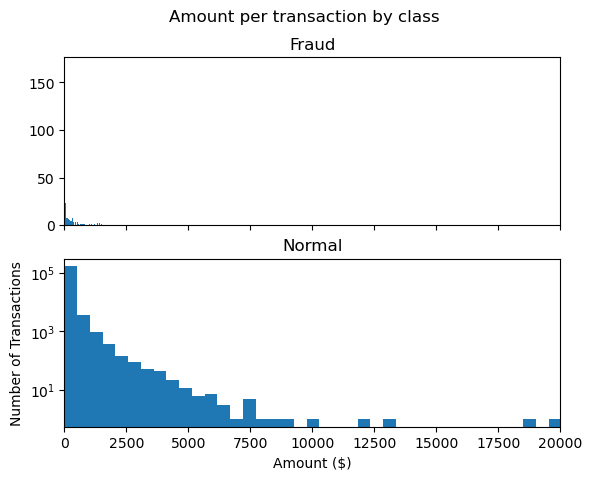

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

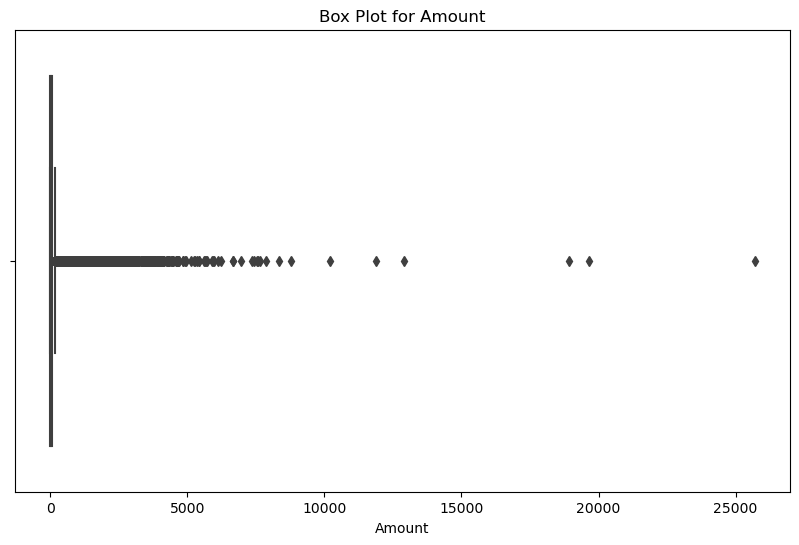

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train["Amount"])
plt.title("Box Plot for Amount")
plt.xlabel("Amount")
plt.show()

In [25]:
import pandas as pd

# Separating data by class
t0 = train[train['Class'] == 0]  # Legitimate transactions
t1 = train[train['Class'] == 1]  # Fraudulent transactions

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Filtering outliers for 'Amount' separately in each class
t0_filtered = remove_outliers(t0, 'Amount')
t1_filtered = remove_outliers(t1, 'Amount')

# Re-combine the filtered data
train_filtered = pd.concat([t0_filtered, t1_filtered]).sort_index()

print("Original dataset shape:", train.shape)
print("Filtered dataset shape:", train_filtered.shape)


Original dataset shape: (170884, 32)
Filtered dataset shape: (151969, 32)


In [26]:
train["Amount"].unique()

array([  8.73,  59.95, 460.65, ..., 101.31, 680.77, 182.88])

C:\Users\lap shop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\lap shop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\lap shop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


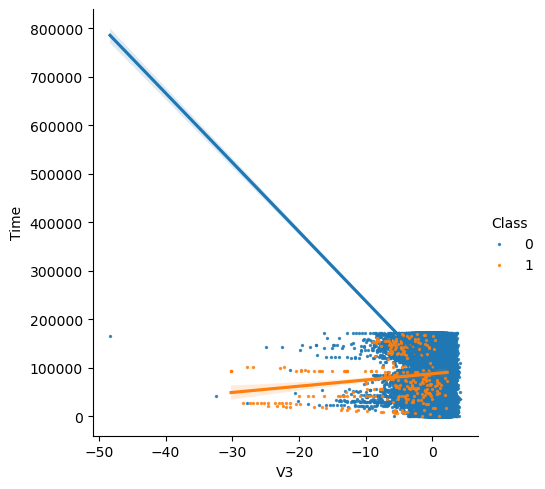

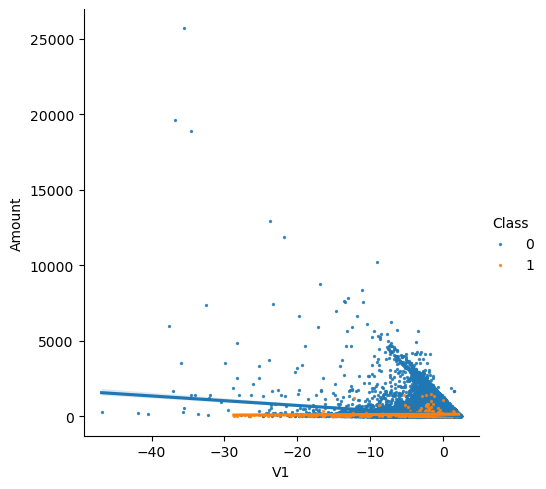

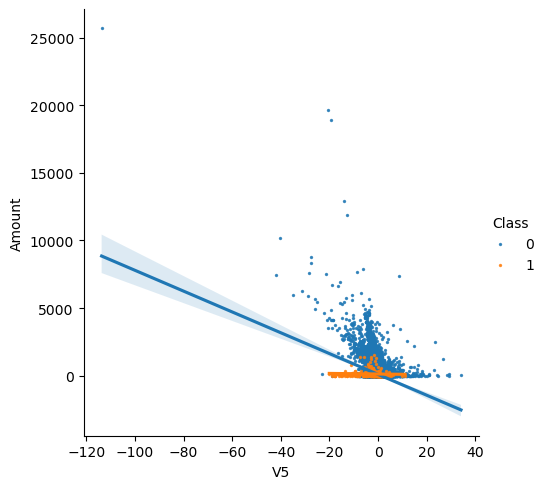

In [32]:
s = sns.lmplot(x='V3', y='Time',data=train, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V1', y='Amount',data=train, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=train, hue='Class', fit_reg=True,scatter_kws={'s':2})

plt.show()

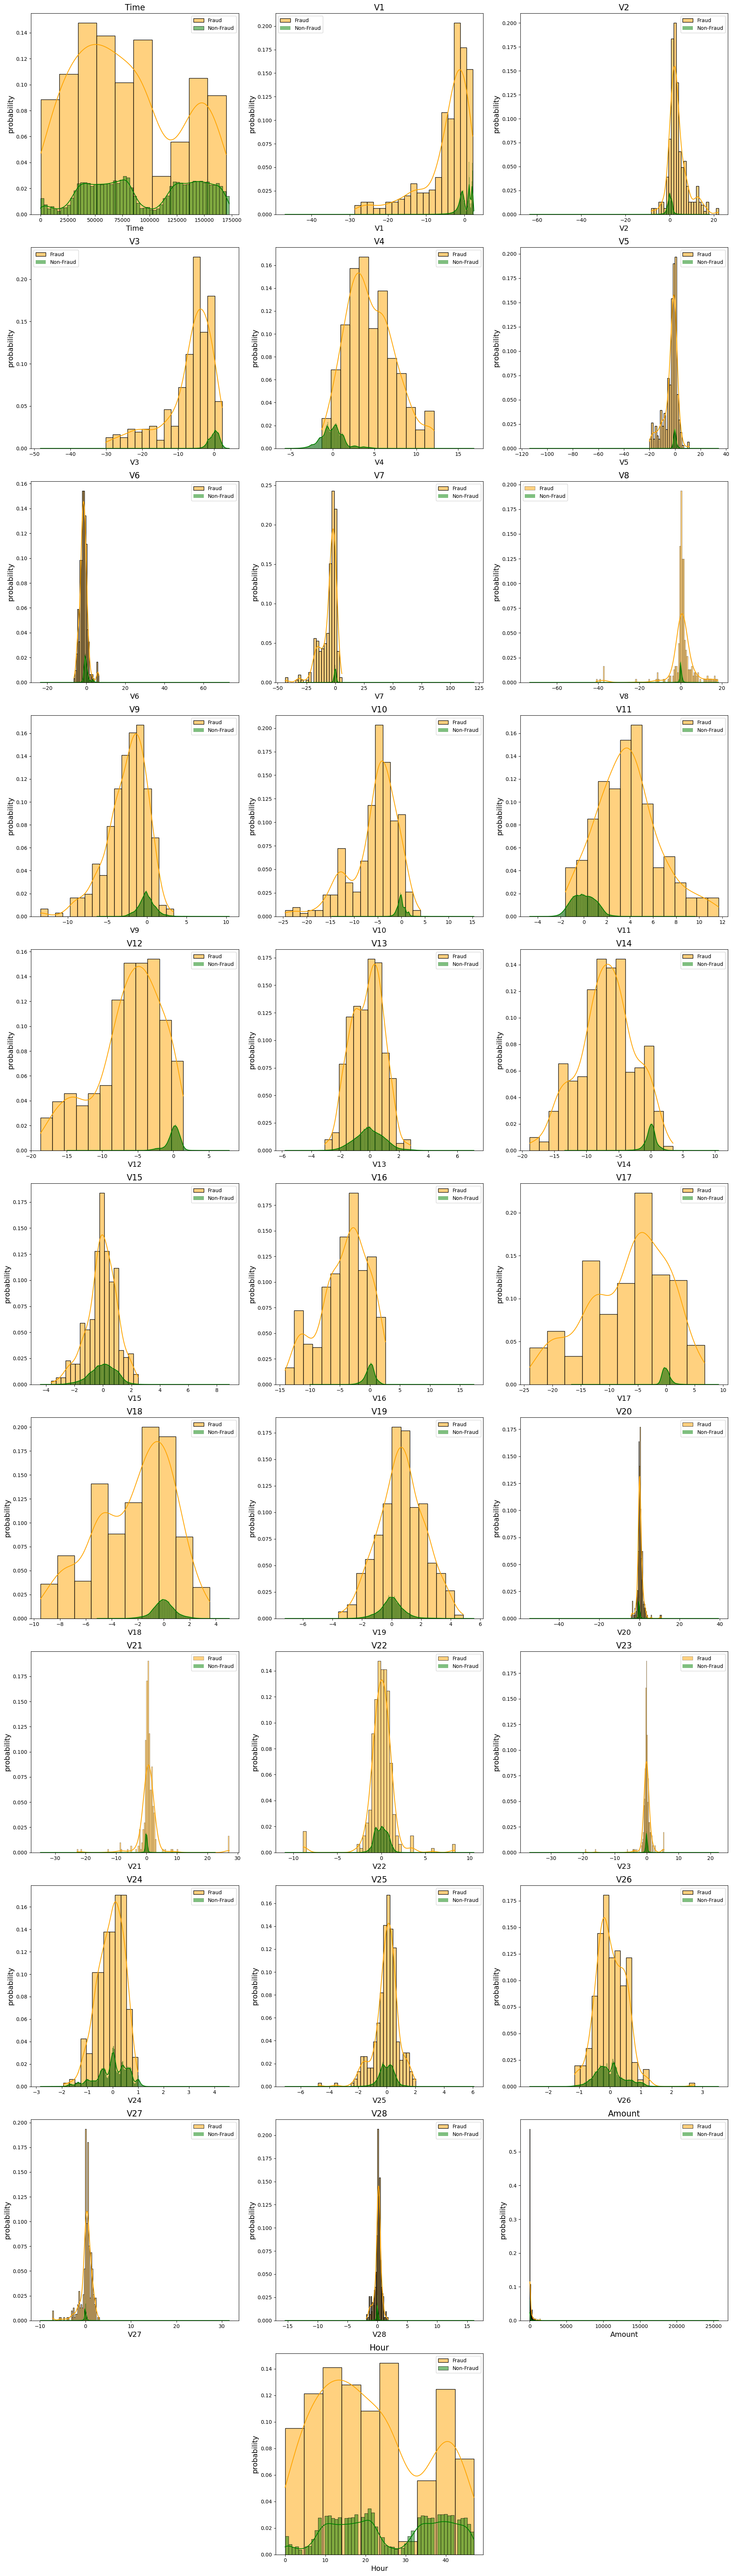

In [27]:
fraud_records = train['Class'] == 1
unfraud_records = train['Class'] == 0

figure = plt.figure(figsize=(20, 70))  
for i, col in enumerate(train.columns.to_list()):
    if col == 'Class':
        continue
    plt.subplot(11, 3, i + 1)  
    sns.histplot(train[col][fraud_records], color='orange', label='Fraud', stat='probability', kde=True, fill=True, alpha=0.5)
    sns.histplot(train[col][unfraud_records], color='green', label='Non-Fraud', stat='probability', kde=True, fill=True, alpha=0.5)
    plt.title(col, fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('probability', fontsize=14)
    plt.legend()
    
plt.tight_layout()
plt.show()


#### According to distributions above:
- Time: Both classes are somewhat evenly distributed, with fraud transactions peaking earlier than non-fraud.
- V1 to V28: The distributions vary significantly between fraud and non-fraud transactions.
- Amount: Non-fraud transactions show a higher density for smaller amounts, while fraud transactions have a broader spread.

In [53]:
train['Time_log'] = np.log1p(train['Time'])
train['Amount_log'] = np.log1p(train['Amount'])

val['Time_log'] = np.log1p(val['Time'])
val['Amount_log'] = np.log1p(val['Amount'])

##  correltion feats

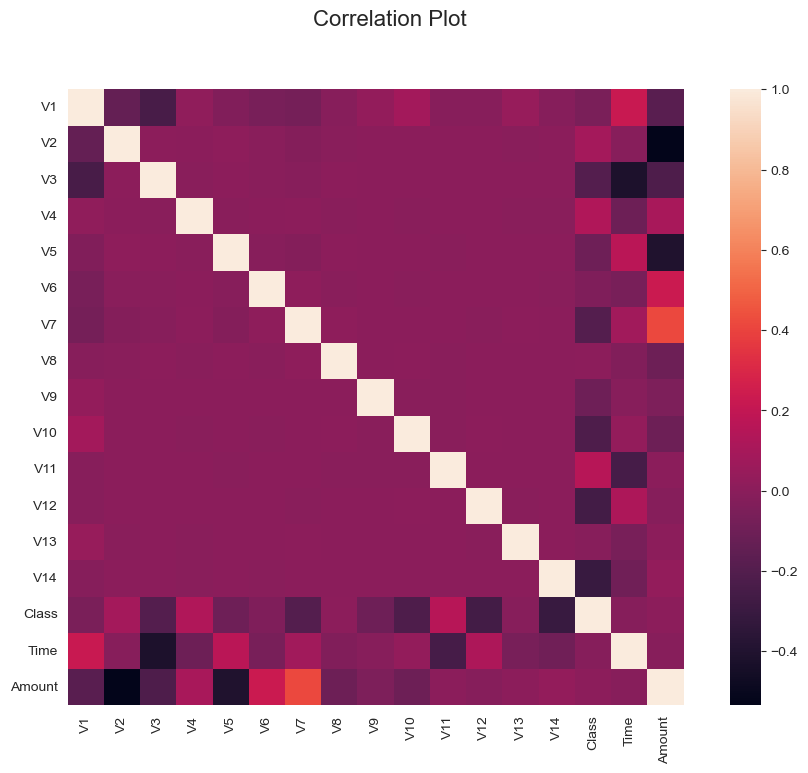

In [56]:
part1=train[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','Class','Time','Amount']]
correlation_matrix = part1.corr()
fig = plt.figure(figsize=(12,8))
fig.suptitle('Correlation Plot', fontsize=16)
sns.heatmap(correlation_matrix,square = True)
plt.show()

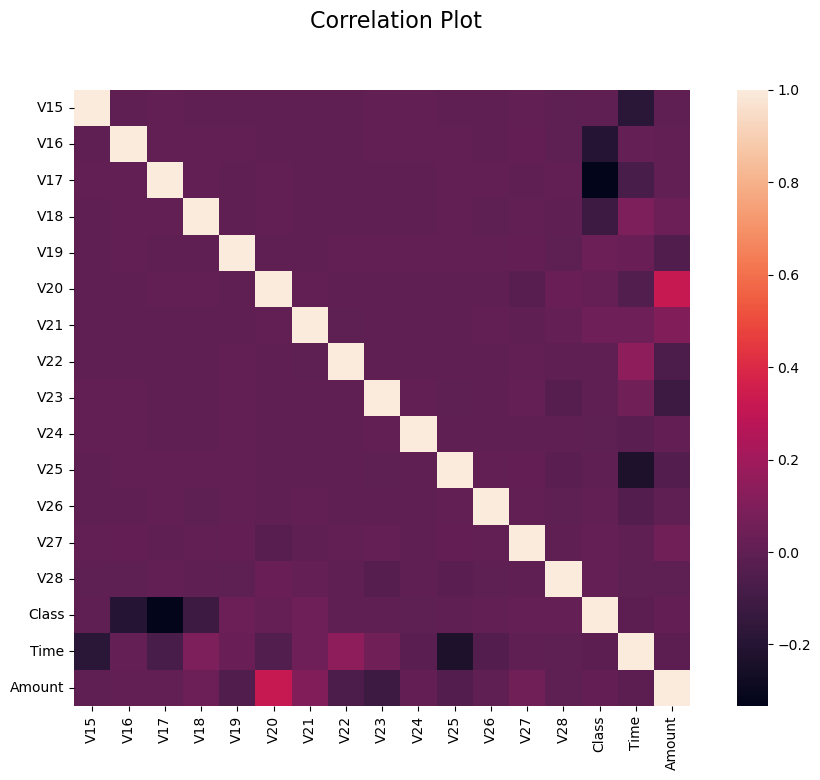

In [29]:
part2=train[['V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Class','Time','Amount']]
correlation_matrix = part2.corr()
fig = plt.figure(figsize=(12,8))
fig.suptitle('Correlation Plot', fontsize=16)
sns.heatmap(correlation_matrix,square = True)
plt.show()

- As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).



In [47]:
# density of feats 

C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\4156680290.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5, label="Class = 0")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\4156680290.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5, label="Class = 1")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\4156680290.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn

C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\4156680290.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5, label="Class = 1")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\4156680290.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5, label="Class = 0")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\4156680290.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn

<Figure size 640x480 with 0 Axes>

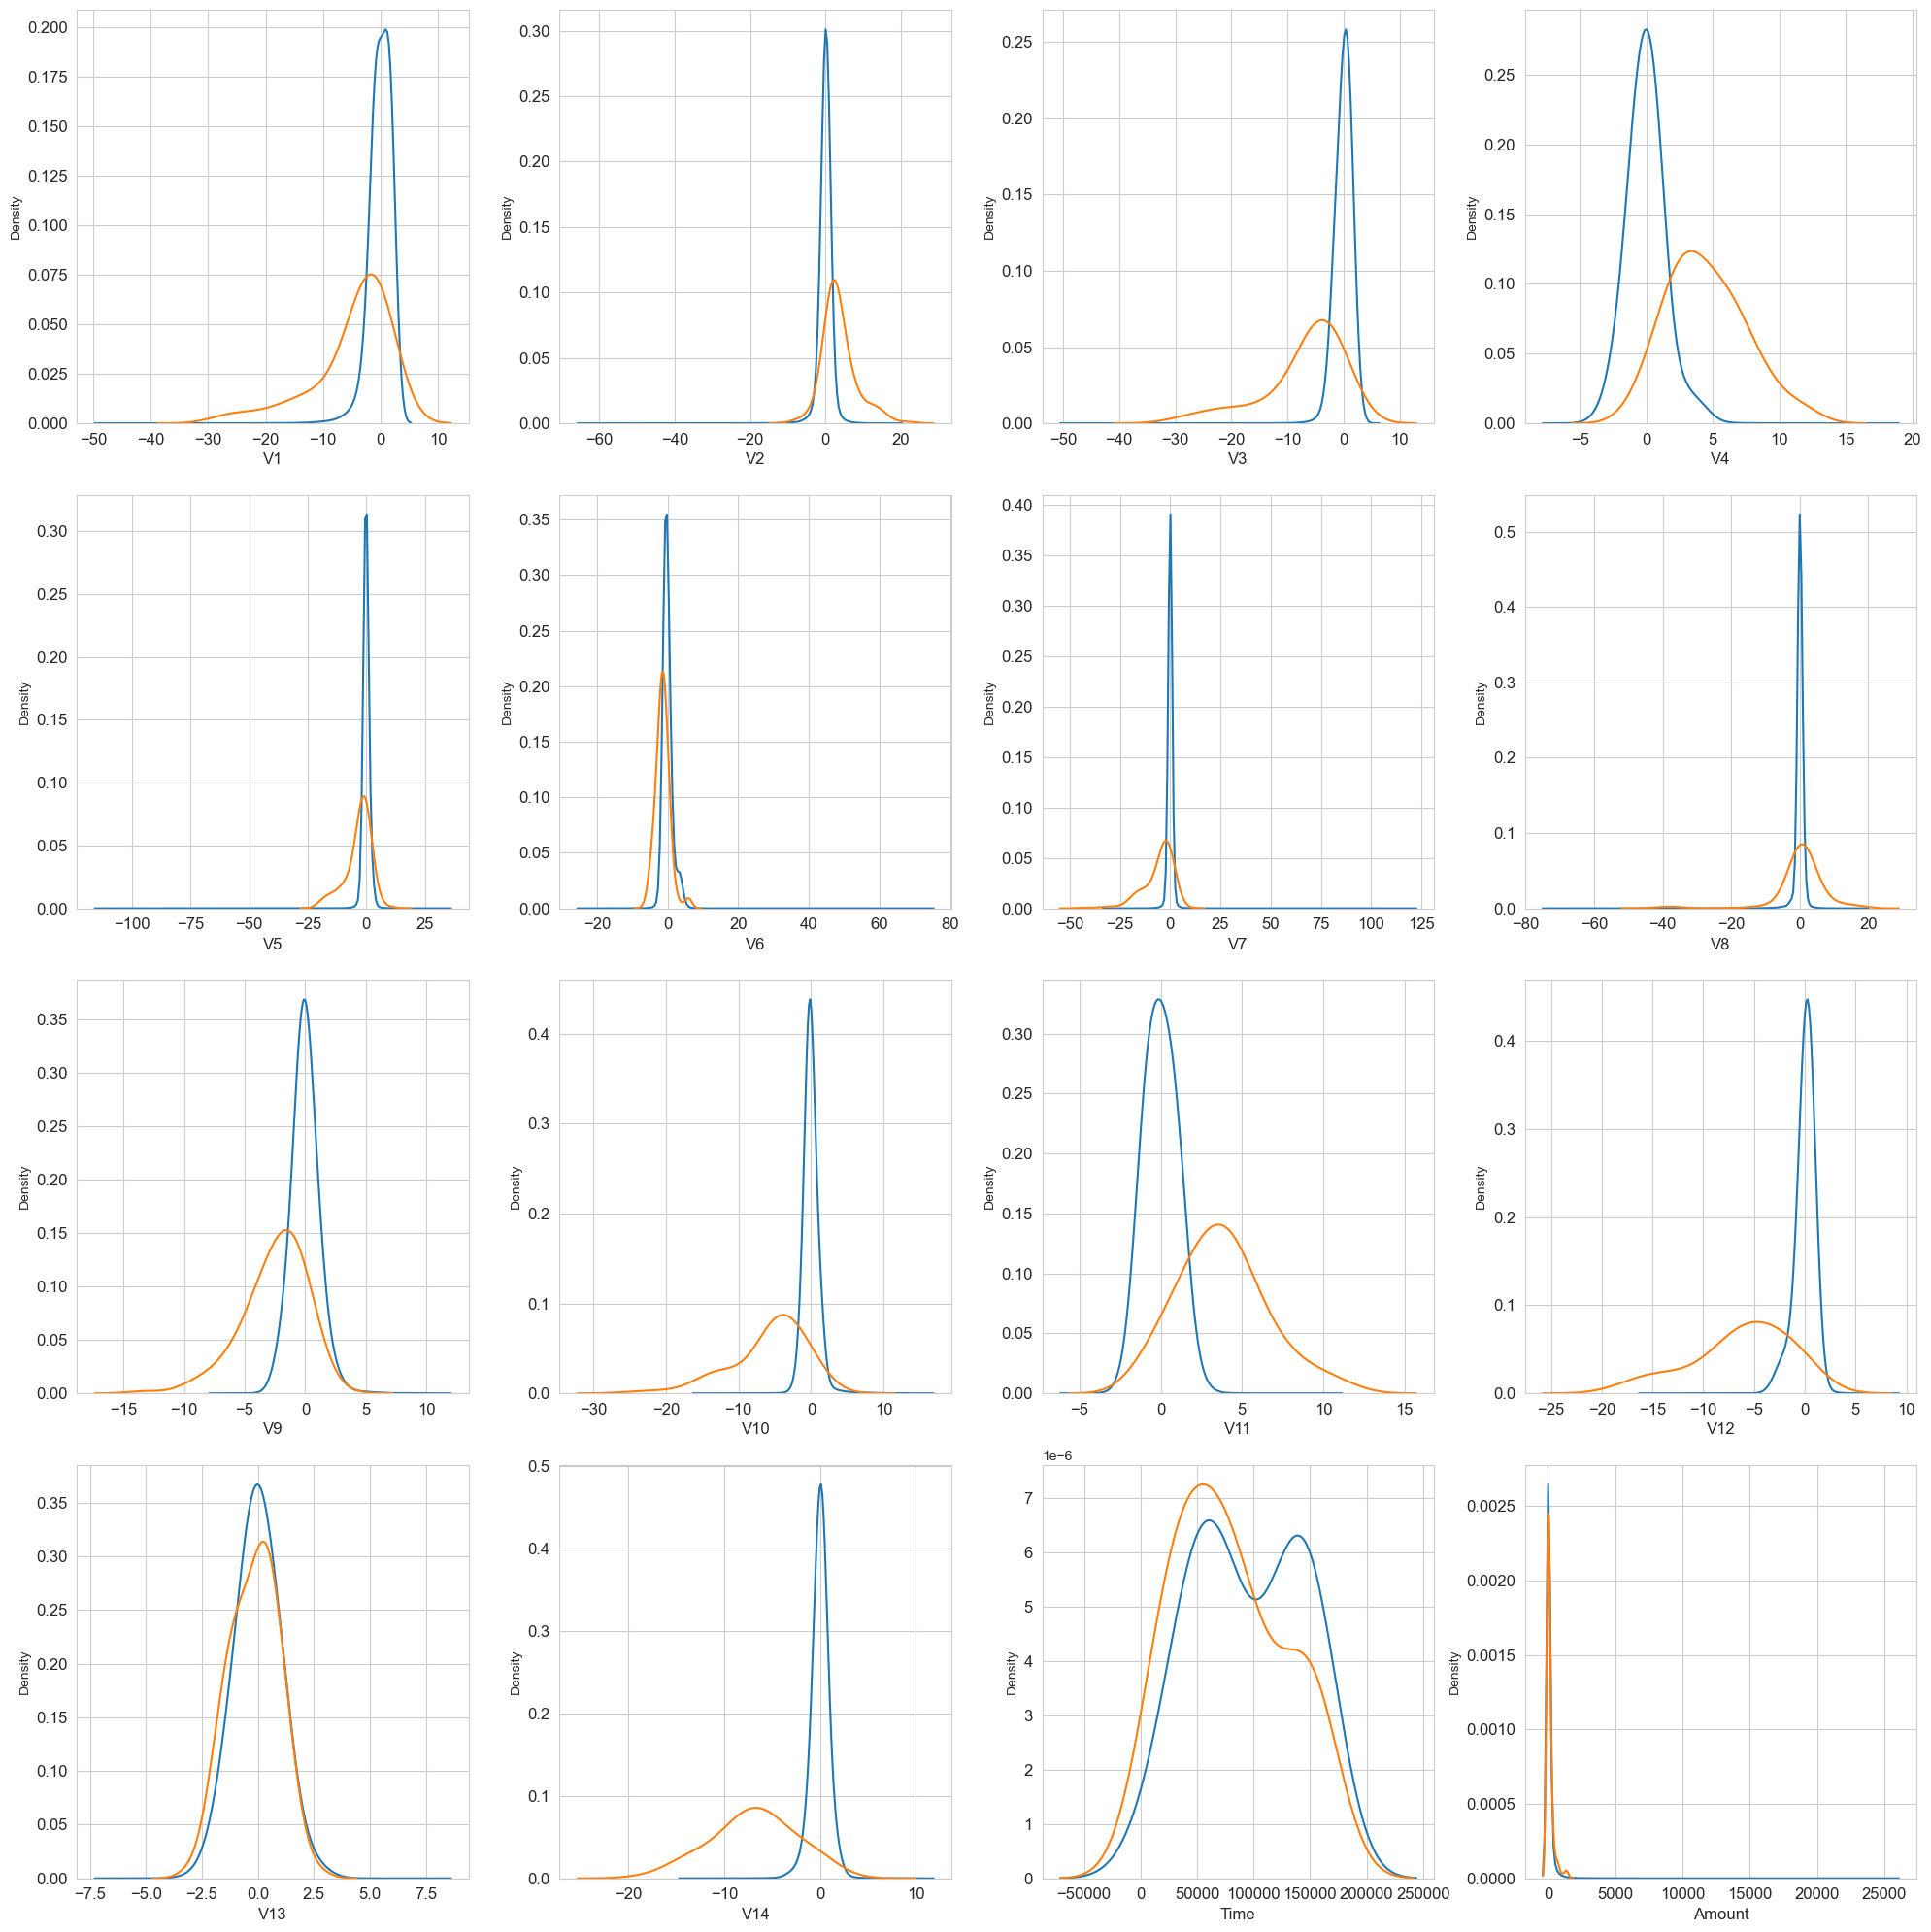

In [34]:
part1=train[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','Time','Amount']]
 

i = 0
t0 = train.loc[train['Class'] == 0]
t1 = train.loc[train['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for feature in part1:
    i += 1
    plt.subplot(4, 4, i)
    sns.kdeplot(t0[feature], bw=0.5, label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5, label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\1201324140.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5, label="Class = 0")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\1201324140.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5, label="Class = 1")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\1201324140.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn

C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\1201324140.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5, label="Class = 1")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\1201324140.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5, label="Class = 0")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_15612\1201324140.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn

<Figure size 640x480 with 0 Axes>

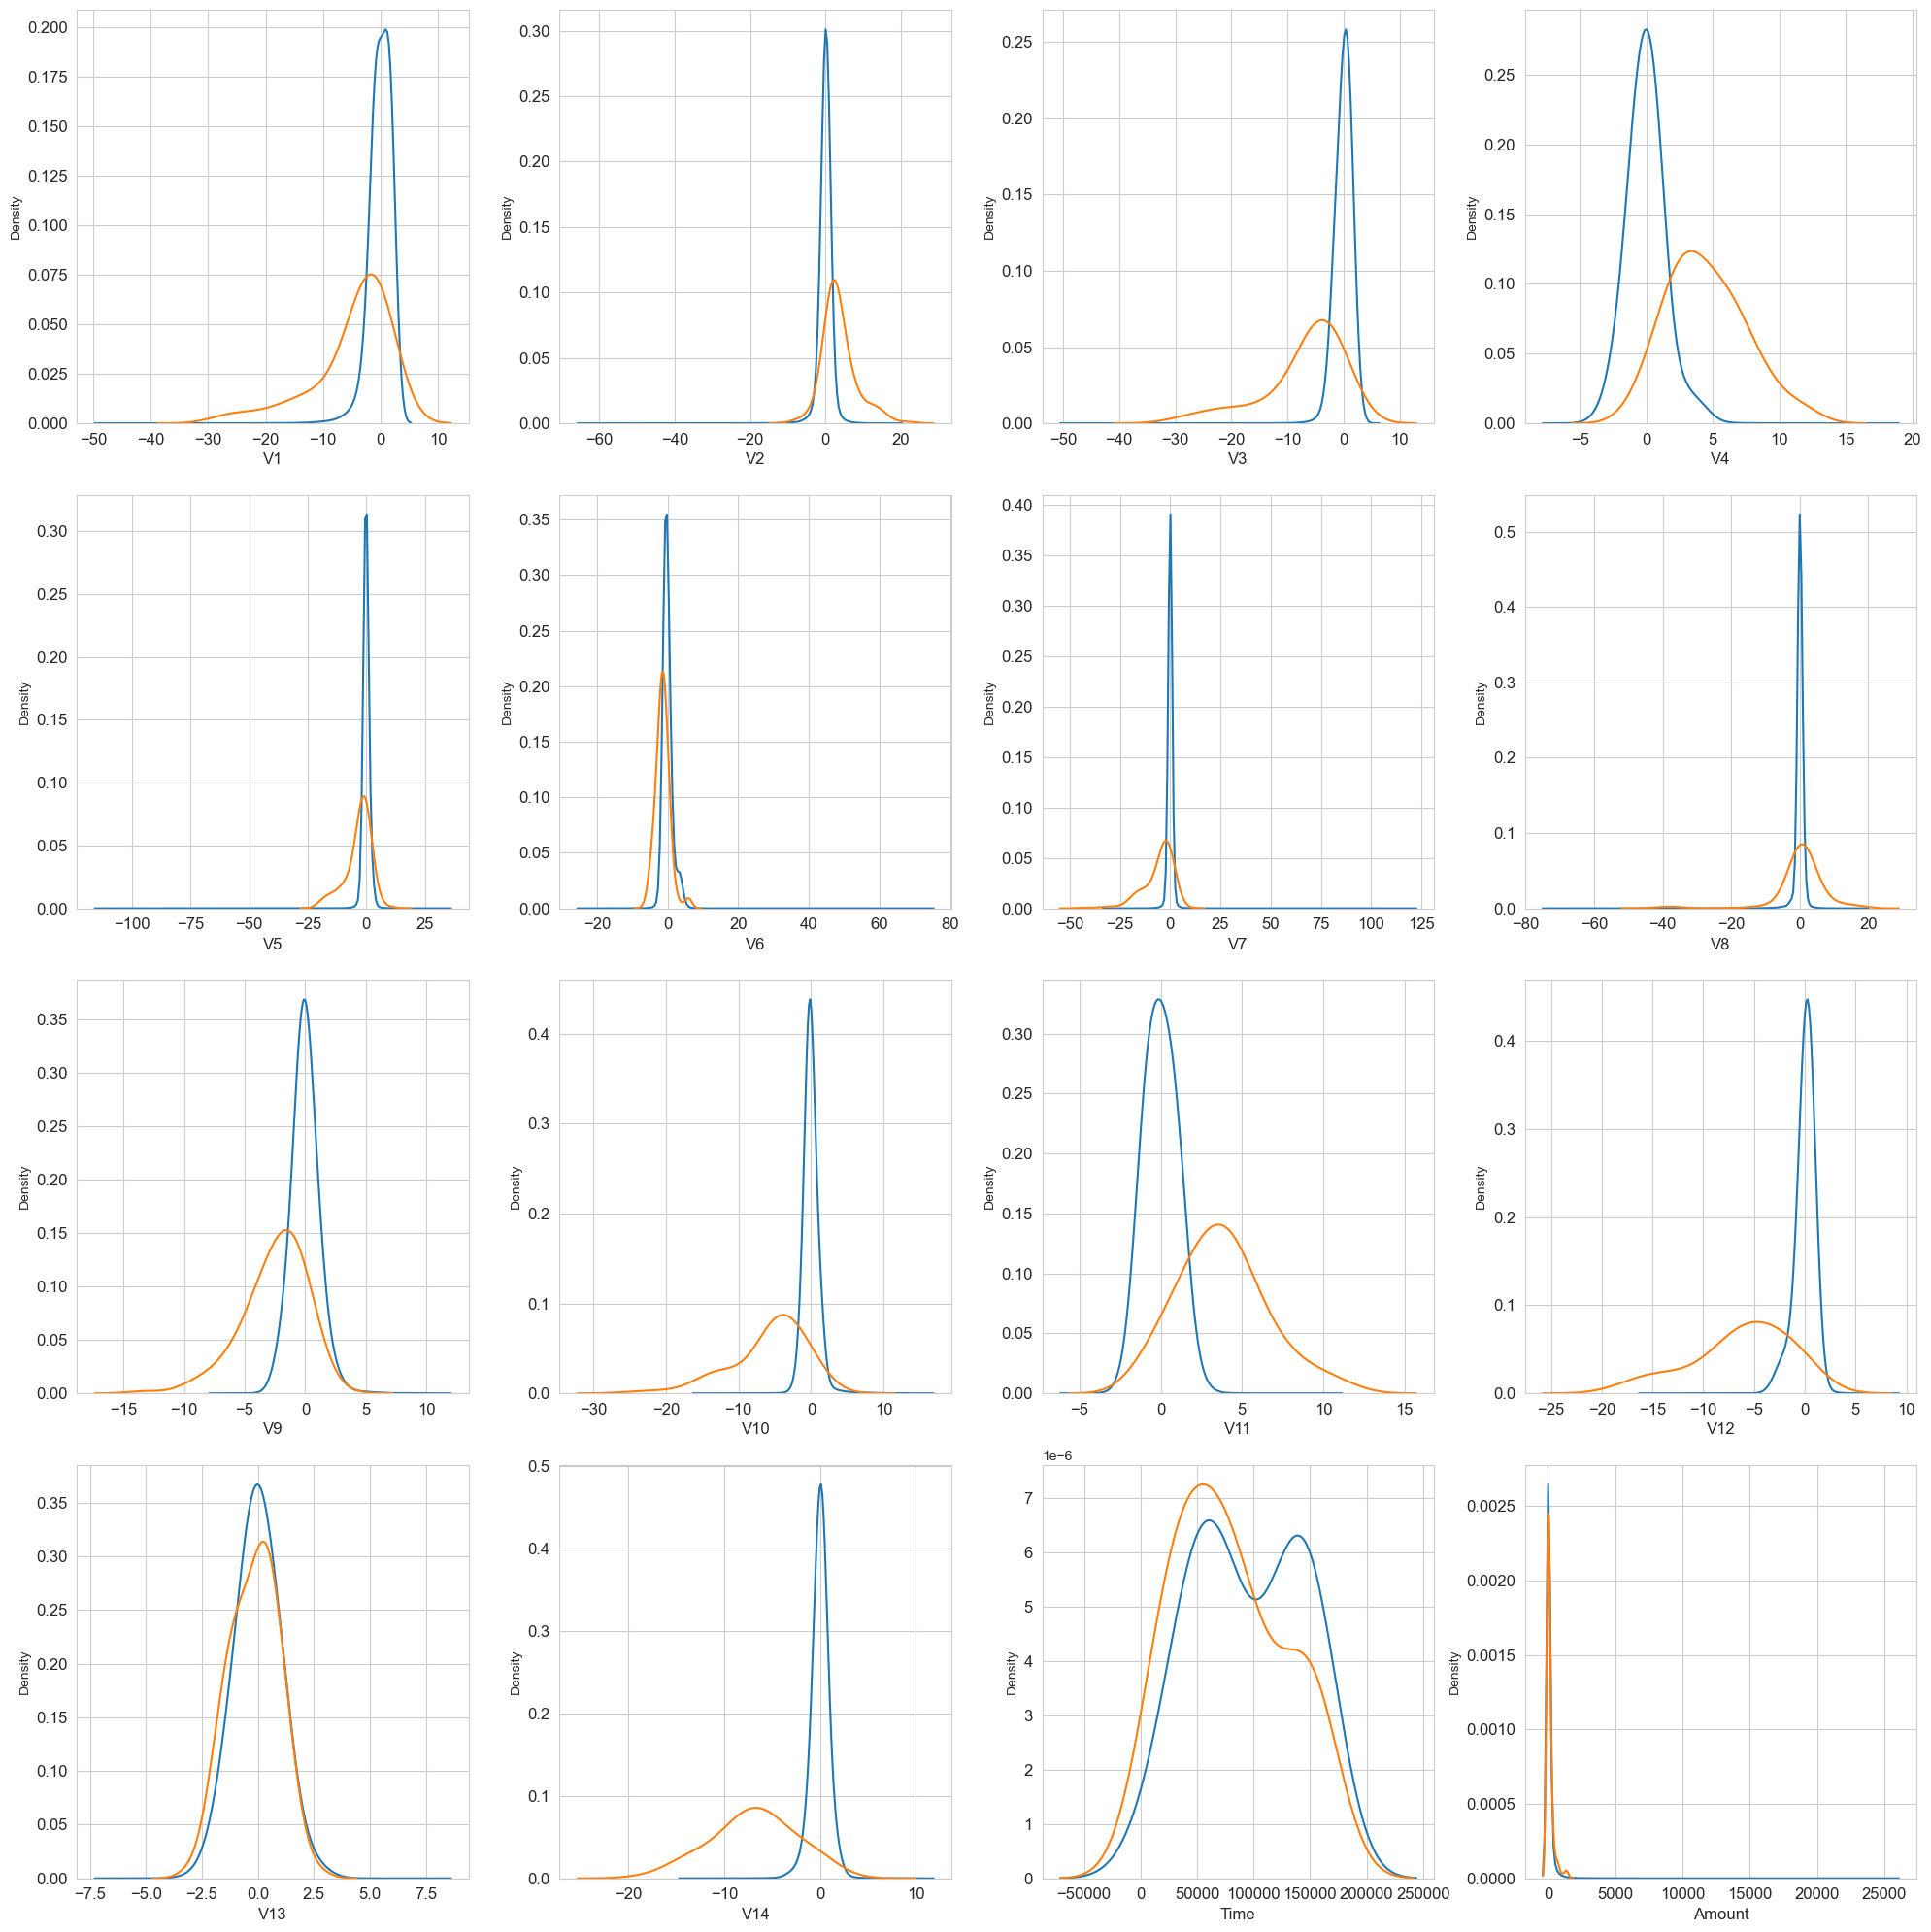

In [35]:
part2=train[['V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']]
 

i = 0
t0 = train.loc[train['Class'] == 0]
t1 = train.loc[train['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for feature in part1:
    i += 1
    plt.subplot(4, 4, i)
    sns.kdeplot(t0[feature], bw=0.5, label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5, label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


- For several features, we can observe distinct distribution patterns between the two Class values.
- Specifically, features like V4 and V11 exhibit clearly separated distributions between Class 0 and Class 1.
- Features such as V12, V14, and V18 show partial separation, while V1, V2, V3, and V10 have noticeably distinct profiles.
- In contrast, features like V25, V26, and V28 display similar distribution profiles for both Class values.


- Overall, with a few exceptions like Time and Amount, the distribution of features for legitimate transactions (Class = 0) is generally centered around 0, often with a long tail extending towards one end. In contrast, fraudulent transactions (Class = 1) tend to have skewed or asymmetric distributions.







